![Image](resources/banner.jpg)

<h1 align="center">Allen Brain Observatory Visual Coding Two-Photon </h1> 
<h2 align="center"> Day 1, Morning Session. SWDB 2024 </h2> 

<h3 align="center">Monday, August 19, 2023</h3> 

The Allen Brain Observatory Visual Coding Two-Photon dataset is a large-scale survey of physiological activity in mouse visual cortex in response to a variety of visual stimuli under passive viewing conditions.  The animals are head-fixed but free to run on a disc.  Single plane two-photon calcium imaging is performed in different areas and layers with transgenically targeted cell lines.  This notebook is a brief introduction to get you started with this data set and lead you to resources for you to explore further.

***What kind of questions can you answer with this dataset?***

This dataset contains recordings of activity in response to a variety of natural and artificial visual stimuli.  This makes it suitable for a variety of coding questions.

- How are stimuli and features from the external world encoded in neural responses?  
- How do the encoding properties differ across areas and layers?  In different cell lines?
- Can you build predictive models of response from stimuli?
- How are running activity and pupil size related to cortical activity?
- How can information about the stimuli and/or the animal's state be extracted from neural activity?  Can you decode stimuli?
- Do neurons coordinate their activity?  Do the act in ensembles?  
- Is there any spatial aspect to neural information?

These are just some of the questions that might be addressed from this type of data.  

***Why two-photon calcium imaging?***

- You get a relatively large number of cells across an area.
- 2D spatial arrangement within a layer.
- Chronic recording across days, and thus more measurements or stimuli.

***Why NOT two-photon calcium imaging?***

- Indirect measure of activity.  One must decide how to extract "activity" from the calcium signal, and what that means.
- Time scale of calcium is slow; you get relatively poor temporal resolution.
- For the indicator and resolution at which these recordings were made, single and low spike count activity is often not observed.

**Databook**

The databook is a resource for more in-depth information and examples for the Allen Brain Observatory Visual Coding Two-photon dataset.  You can find the pages for this data set here:  https://allenswdb.github.io/physiology/ophys/visual-coding/vc2p-background.html

![Image](resources/databook_vc2p.png)

***Remember the tools you have!***

- Use the databook as a reference; this notebook contains only a small portion of what is in the databook!
- Use the help function to find function arguments
- Use `dir` to see data and functions in an object
- Use tab complete in jupyter 


Using the Python objects we'll show you below, you can extract information about this dataset such as how many recordings from a given area or Cre line.

For each targeted area, layer, and Cre line, each mouse is recorded for three sessions (see more on this below).  There is a datafile for each session that includes (not exhaustive):

- Various flourescence traces from different stages of the processing pipeline.
- Running activity of the mouse
- Pupil size and eye tracking (for some sessions)
- Stimulus presentation timing and templates
- Max projection images and roi masks for each cell
- Extracted event traces from a deconvolution algorithm (in a separate file)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import platform, os

%matplotlib inline

The following cell sets up a path variable so that this notebook will work on the cloud or using data accessed locally, e.g. from your hard drive.

In [2]:
# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

This dataset is accessed via the `allensdk` python package.  It requires instantiating a `BrainObservatoryCache` object that we usually call `boc`.  You'll access all of the data for this dataset using this object.

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

***Plotting responses and stimulus epochs***

To give you an overview of how to access and use this data set, we are going to demonstrate accessing data for a session and plotting traces overlayed with stimulus epochs.

![Image](resources/vc2p.png)

You can get general information, such as the available areas or stimuli using queries that often start with `get_`.  Use introspection or see the databook for other possibilities.

In [4]:
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [5]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

***Homework 1***

What areas and depths are available?  What other dimensions of the data can be acquired this way?

The experiments are arranged in *containers*, which are a set of recording sessions that include a complete set of stimuli.  In this dataset, there are three sessions per container.  

![Image](resources/VC2p-sessions.png)

In [6]:
experiment_containers = boc.get_experiment_containers()

In [7]:
pd.DataFrame(experiment_containers)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,660492886,275,VISal,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),306500,Sst-IRES-Cre;Ai148(CAM)-306500,[],False
1,651773425,375,VISl,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),351315,Fezf2-CreER;Ai148-351315,[],False
2,546328009,350,VISal,Nr5a1-Cre,Ai93(TITL-GCaMP6f),261969,Nr5a1-Cre;Camk2a-tTA;Ai93-261969,[],False
3,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False
4,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False
...,...,...,...,...,...,...,...,...,...
451,591392164,175,VISrl,Cux2-CreERT2,Ai93(TITL-GCaMP6f),308148,Cux2-CreERT2;Camk2a-tTA;Ai93-308148,[],False
452,572607996,375,VISal,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),291465,Rbp4-Cre_KL100;Camk2a-tTA;Ai93-291465,[],False
453,527676429,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False
454,580043437,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297504,Sst-IRES-Cre;Ai148(CAM)-297504,[],False


***Homework 2***

How can you return only those experiment containers from a particular area or Cre line?

In [8]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[511510911])

In [9]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,508596945,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),85,511510911,three_session_B,230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,False
1,508356957,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),84,511510911,three_session_A,230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,True
2,506353473,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),77,511510911,three_session_C,230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,True


***Homework 3***

How would you get a list of all sessions that included a particular stimulus, say natural scenes?

Note:  `id` in the experiment containers table is the *container id*.  `id` in the sessions table is the *session id*.


![Image](resources/stim_container.png)

The `get_ophys_experiment_data` method will instantiate an object that contains the actual data for a single session.  If you do not have the data properly mounted (either on Code Ocean or via your hard drive) you will get a warning that the data is being downloaded here.

In [10]:
session_id = 508356957
session_data = boc.get_ophys_experiment_data(session_id)

The processed DF/F traces for that session can be returned via the following function.  This returns a tuple containing time stamps and a numpy array of shape (neurons, acquisition frames).  

In [11]:
t, dff = session_data.get_dff_traces()

***Homework 4***

What other traces are available in the session data?  What do they represent?

Text(0.5, 1.0, 'DF/F trace for cell index 10')

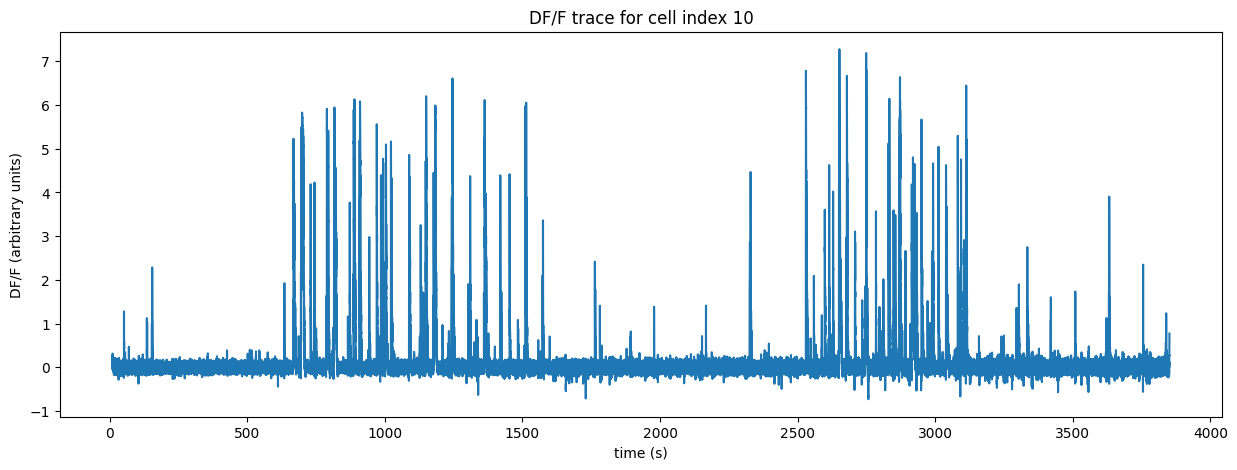

In [12]:
n = 10

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t, dff[n])
ax.set_xlabel('time (s)')
ax.set_ylabel('DF/F (arbitrary units)')
ax.set_title('DF/F trace for cell index {}'.format(n))

***Task 1***

Choose different cell indices and remake the plot above.  Can you find cells with intereseting responses?

In our analyses, we often use "extracted events", which are deconvolved fluorescence traces using an algorithm from Daniela Witten and Sean Jewell.  These are not in the session_data object but are accessed via a function from `boc`.

In [13]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

Text(0.5, 1.0, 'DF/F trace for cell index 10')

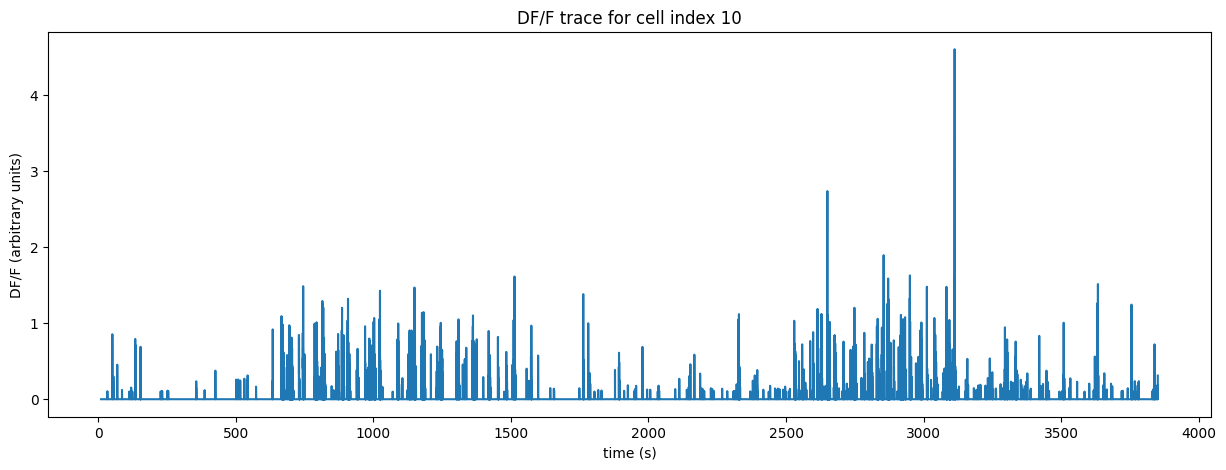

In [14]:
n = 10

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t, events[n])
ax.set_xlabel('time (s)')
ax.set_ylabel('DF/F (arbitrary units)')
ax.set_title('DF/F trace for cell index {}'.format(n))

Information about when each stimulus type is shown is contained in the `stimulus_epoch_table`.  `start` and `end` denote the *acquisition frame* on which that stimulus epoch began or ended.

In [15]:
stim_epoch = session_data.get_stimulus_epoch_table()

In [16]:
stim_epoch_table = pd.DataFrame(stim_epoch)
stim_epoch_table

,stimulus,start,end
0,drifting_gratings,745,18778
1,natural_movie_three,19712,37774
2,natural_movie_one,38690,47720
3,drifting_gratings,48623,66654
4,spontaneous,66804,75716
5,natural_movie_three,75717,93777
6,drifting_gratings,94681,115239


We will use the function `ax.axvspan` to shade the temporal window during which a single stimulus epoch occured.  First let's grab the `start` and `end` frames for the epoch during which `natural_movie_one` was shown.

***Task 2***

Remake the plot of extracted events vs. time.  Use the function axvspan and the stimulus_epoch_table to shade the region during which natural_movie_one was shown.

In [17]:
start = stim_epoch_table[stim_epoch_table.stimulus=='natural_movie_one'].start.iloc[0]
end = stim_epoch_table[stim_epoch_table.stimulus=='natural_movie_one'].end.iloc[0]
start, end

(38690, 47720)

Text(0.5, 1.0, 'DF/F trace for cell index 10')

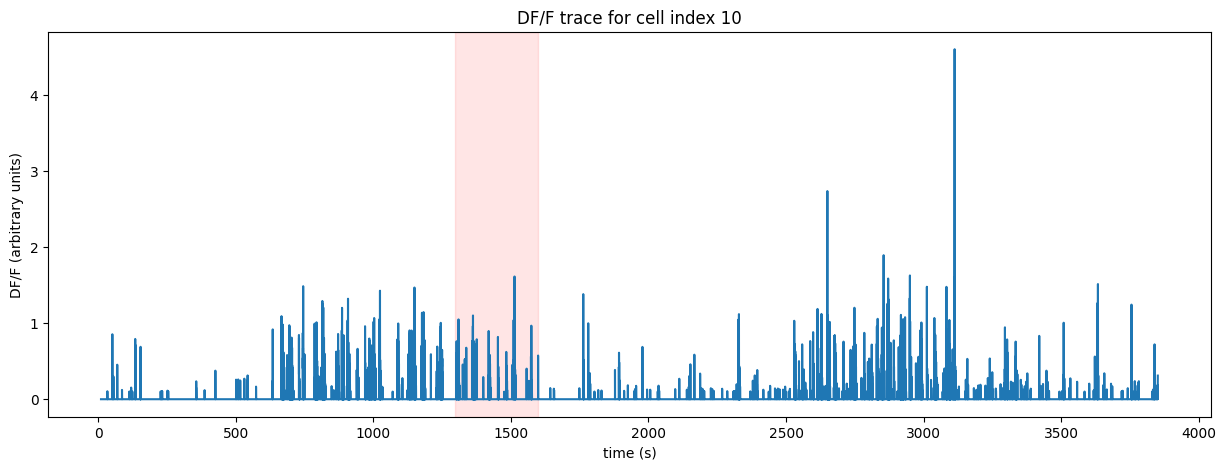

In [18]:
n = 10

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t, events[n])
ax.axvspan(xmin=t[start], xmax=t[end], color='r', alpha=0.1)
ax.set_xlabel('time (s)')
ax.set_ylabel('DF/F (arbitrary units)')
ax.set_title('DF/F trace for cell index {}'.format(n))

***Task 3***

A.  Remake the previous plot.  Add all of the stimulus epochs, with a unique color for each stimulus type.  (Hint:  define a list of colors beforehand.)

B.  Add all of the other traces in the experiment, using a vertical offset so they don't overlap.

Text(0.5, 1.0, 'DF/F trace for cell index 10')

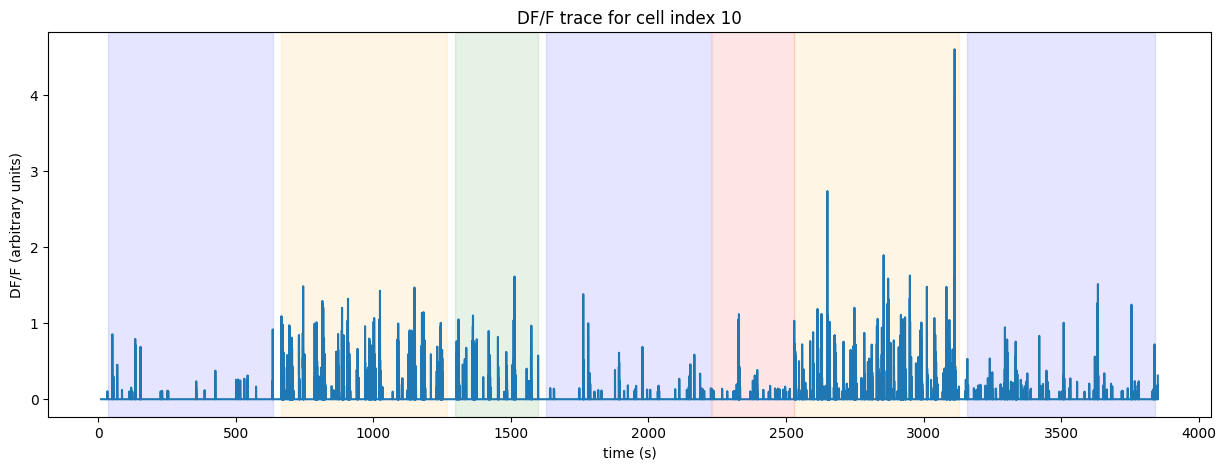

In [19]:
colors = ['blue','orange','green','red']
n = 10

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t, events[n])

for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        ax.axvspan(xmin=t[stim.start.iloc[j]], xmax=t[stim.end.iloc[j]], color=colors[c], alpha=0.1)


ax.set_xlabel('time (s)')
ax.set_ylabel('DF/F (arbitrary units)')
ax.set_title('DF/F trace for cell index {}'.format(n))


Text(0, 0.5, 'Extracted Events (arbitrary units)')

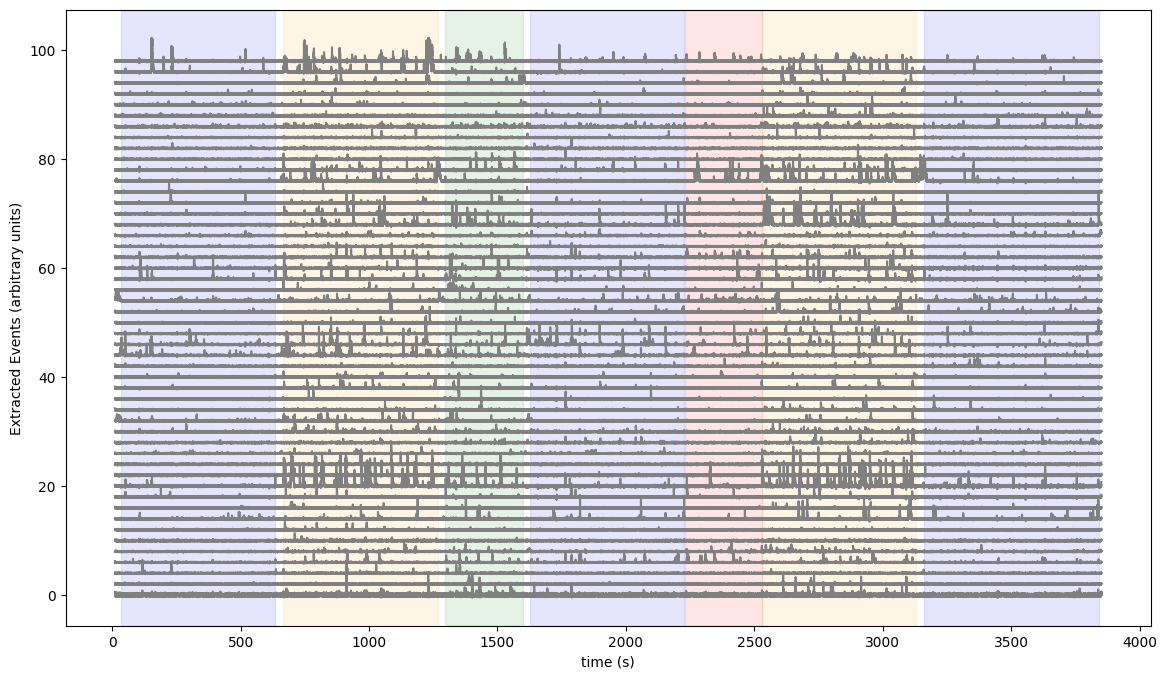

In [20]:
fig, ax = plt.subplots(figsize=(14,8))

#here we plot the first 50 neurons in the session
for i in range(50):
    ax.plot(t, dff[i,:]+(i*2), color='gray')
    
#here we shade the plot when each stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        ax.axvspan(xmin=t[stim.start.iloc[j]], xmax=t[stim.end.iloc[j]], color=colors[c], alpha=0.1)
        
ax.set_xlabel("time (s)")
ax.set_ylabel("Extracted Events (arbitrary units)")

***Homework 5***

Add a trace of the running speed and pupil size (if available) to the plot above.

***Homework 6***

Make a plot similar to the above with shading for the times when an individual frame of natural scenes was presented.  (Hint:  consult the data book).

***Homework 7***

Make a plot of the max projection image for a single session.  Compute the average activity across the sessions for each cell and shade the rois in the max projection image according to that activity.

:::{admonition} Hint #1
:class: dropdown
hint #1
:::
:::{admonition} Hint #2
:class: dropdown
hint #1
:::

***Homework 8***

As described above, the same set of neurons are targeted for each of the three sessions in a container, but not all cells appear in every session (see the graphic below).  Identify the cells that are common are across all three sessions in a container and remake the plot above with just those cells.  (Hint:  the indices for the dff traces are specific to each session.  To connect cells across sessions you will need to know what a `cell_specimen_id` is.  Check the databook!)


![Image](resources/cell_specimens.png)